In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,train_test_split

In [3]:
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")

In [4]:
X=df.drop(columns=["cnt","casual","registered","dteday","atemp","yr","instant"],axis=1)
y_registered=df["registered"]
y_casual=df["casual"]
X_train,X_test,y_reg_train,y_reg_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)#Splitting data equally and changes in X_train and y_reg train are ignored
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [5]:
model_reg=LinearRegression()
model_cas=LinearRegression()
model_reg.fit(X_train, y_reg_train)
model_cas.fit(X_train, y_cas_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
pred_reg = model_reg.predict(X_test)
pred_cas = model_cas.predict(X_test)
pred_cnt = pred_reg + pred_cas

In [7]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse_cnt = mean_squared_error(y_reg_test + y_cas_test, pred_cnt)
print(f"MSE for cnt (via sum of two models): {mse_cnt}")

MSE for cnt (via sum of two models): 1802098.9133526157


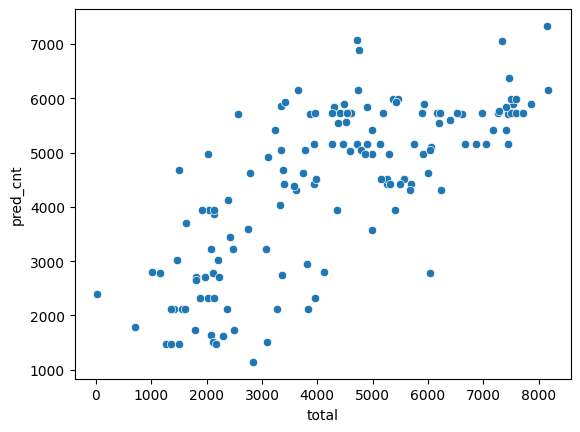

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
total = y_reg_test + y_cas_test
df_plot = pd.DataFrame({
    "total": total,
    "pred_cnt": pred_cnt
})
sns.scatterplot(x="total", y="pred_cnt", data=df_plot)
plt.show()

In [38]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2 = r2_score(df_plot["total"], df_plot["pred_cnt"])
rmse = np.sqrt(mean_squared_error(df_plot["total"], df_plot["pred_cnt"]))
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.5450305847815052
RMSE: 1350.6938216826998


In [48]:
from sklearn.tree import DecisionTreeRegressor
X_train,X_test,y_rt_train,y_rt_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [49]:
rt_reg=DecisionTreeRegressor(criterion="squared_error",max_depth=1000)
rt_cas=DecisionTreeRegressor(criterion="squared_error",max_depth=1000)
rt_reg.fit(X_train,y_reg_train)
rt_cas.fit(X_train,y_cas_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1000
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [50]:
pred_rt = rt_reg.predict(X_test)
pred_cas = rt_cas.predict(X_test)
pred_cnt = pred_rt + pred_cas

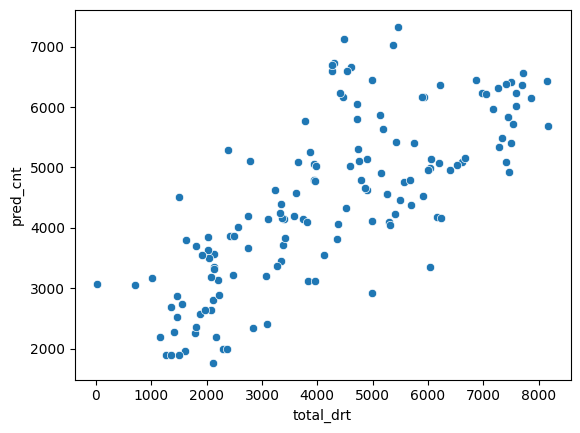

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
total_drt = y_rt_test + y_cas_test
df_plot = pd.DataFrame({
    "total_drt": total,
    "pred_cnt": pred_cnt
})
sns.scatterplot(x="total_drt", y="pred_cnt", data=df_plot)
plt.show()

In [59]:
r2 = r2_score(df_plot["total_drt"], df_plot["pred_cnt"])
total_drt=y_rt_test+y_cas_test
rmse = np.sqrt(mean_squared_error(df_plot["total_drt"], df_plot["pred_cnt"]))
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.5471689715029049
RMSE: 1347.5159074725366


In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,train_test_split
import pandas as pd
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
X=df.drop(columns=["cnt","casual","registered","dteday","atemp","yr","instant"],axis=1)
y_registered=df["registered"]
y_casual=df["casual"]
X_train,X_test,y_rid_train,y_rid_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)#Splitting data equally and changes in X_train and y_reg train are ignored
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [53]:
model_rid=Ridge()
model_cas=Ridge()
param_grid = {"alpha": np.logspace(-3, 3, 10)}   # 0.001 → 1000
grid_1=GridSearchCV(model_rid, param_grid, cv=5, scoring="r2")
grid_1.fit(X_train, y_rid_train)
grid_2=GridSearchCV(model_cas, param_grid, cv=5, scoring="r2")
grid_2.fit(X_train, y_cas_train)
best_alpha_1= grid_1.best_params_["alpha"]
best_alpha_2 = grid_2.best_params_["alpha"]
print("Best alpha for 1st Model:", best_alpha_1)
print("Best alpha for 2nd Model:", best_alpha_2)
model_rid = Ridge(alpha=best_alpha_1)
model_cas = Ridge(alpha=best_alpha_2)
model_rid.fit(X_train, y_rid_train)
model_cas.fit(X_train, y_cas_train)

Best alpha for 1st Model: 0.46415888336127775
Best alpha for 2nd Model: 0.1


,alpha,np.float64(0.1)
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [54]:
pred_rid = model_rid.predict(X_test)
pred_cas = model_cas.predict(X_test)
pred_cnt = pred_rid + pred_cas

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse_cnt = mean_squared_error(y_rid_test + y_cas_test, pred_cnt)
print(f"MSE for cnt (via sum of two models): {mse_cnt}")

MSE for cnt (via sum of two models): 1824373.7999318165


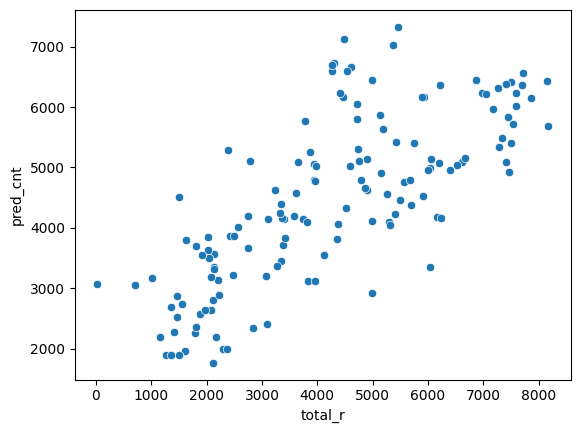

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
total_r = y_rid_test + y_cas_test
df_plot = pd.DataFrame({
    "total_r": total_r,
    "pred_cnt": pred_cnt
})
sns.scatterplot(x="total_r", y="pred_cnt", data=df_plot)
plt.show()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2 = r2_score(df_plot["total_r"], df_plot["pred_cnt"])
rmse = np.sqrt(mean_squared_error(df_plot["total_r"], df_plot["pred_cnt"]))
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.5471689715029049
RMSE: 1347.5159074725366


In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,train_test_split
import pandas as pd
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
X=df.drop(columns=["cnt","casual","registered","dteday","atemp","yr","instant"],axis=1)
y_registered=df["registered"]
y_casual=df["casual"]
X_train,X_test,y_las_train,y_las_test=train_test_split(X,y_registered,test_size=0.2,random_state=42)#Splitting data equally and changes in X_train and y_reg train are ignored
_,_,y_cas_train,y_cas_test=train_test_split(X,y_casual,test_size=0.2,random_state=42)

In [32]:
model_las=Lasso()
model_cas=Lasso()
param_grid = {"alpha": np.logspace(-3, 3, 10)}   # 0.001 → 1000
grid_1=GridSearchCV(model_las, param_grid, cv=5, scoring="r2")
grid_1.fit(X_train, y_las_train)
grid_2=GridSearchCV(model_cas, param_grid, cv=5, scoring="r2")
grid_2.fit(X_train, y_cas_train)
best_alpha_1= grid_1.best_params_["alpha"]
best_alpha_2 = grid_2.best_params_["alpha"]
print("Best alpha for 1st Model:", best_alpha_1)
print("Best alpha for 2nd Model:", best_alpha_2)
model_las = Lasso(alpha=best_alpha_1)
model_cas = Lasso(alpha=best_alpha_2)
model_las.fit(X_train, y_las_train)
model_cas.fit(X_train, y_cas_train)

Best alpha for 1st Model: 2.154434690031882
Best alpha for 2nd Model: 0.001


,alpha,np.float64(0.001)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [33]:
pred_las = model_las.predict(X_test)
pred_cas = model_cas.predict(X_test)
pred_cnt = pred_las + pred_cas

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse_cnt = mean_squared_error(y_las_test + y_cas_test, pred_cnt)
print(f"MSE for cnt (via sum of two models): {mse_cnt}")

MSE for cnt (via sum of two models): 1824373.7999318165


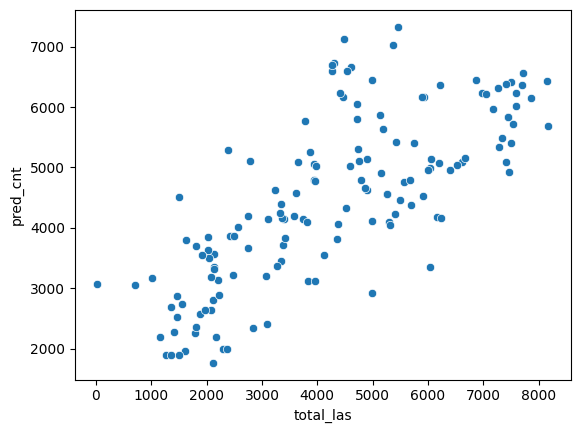

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
total_las = y_las_test + y_cas_test
df_plot = pd.DataFrame({
    "total_las": total,
    "pred_cnt": pred_cnt
})
sns.scatterplot(x="total_las", y="pred_cnt", data=df_plot)
plt.show()

In [65]:
print(total_las)

703    6606
33     1550
300    3747
456    6041
633    7538
       ... 
70     2132
192    4258
328    2792
165    5180
135    3958
Length: 147, dtype: int64


In [66]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
r2 = r2_score(df_plot["total_las"], df_plot["pred_cnt"])
rmse = np.sqrt(mean_squared_error(df_plot["total_las"], df_plot["pred_cnt"]))
print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.5471689715029049
RMSE: 1347.5159074725366


C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE: 2075.5509896318376


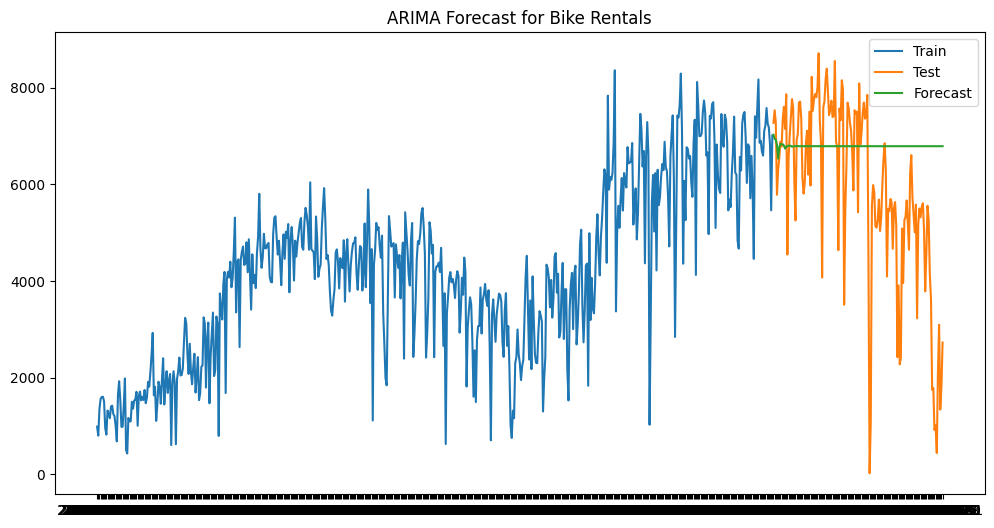

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load dataset
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
df.set_index("dteday", inplace=True)

# Target variable: total count
y = df["cnt"]

# Split train-test (80-20)
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Fit ARIMA model (p,d,q)
# You may need to tune p,d,q → start simple with (5,1,0)
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Forecast on test set
forecast = model_fit.forecast(steps=len(test))

# Evaluate
rmse = np.sqrt(mean_squared_error(test, forecast))
print("RMSE:", rmse)

# Plot
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, forecast, label="Forecast")
plt.legend()
plt.title("ARIMA Forecast for Bike Rentals")
plt.show()

In [73]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load data
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)

# Use the total count column
y = df['cnt']

# Fit SARIMAX model (Order: (1,1,1), Seasonal: (1,1,1,7) for weekly pattern)
model = SARIMAX(
    y,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Print the model summary
print(results.summary())

# Forecast next 30 days
y_forecast = results.get_forecast(steps=30)
forecast = y_forecast.predicted_mean

# Build forecast dataframe
forecast_df = pd.DataFrame({
    'date': pd.date_range(start=y.index[-1] + pd.Timedelta(days=1), periods=30),
    'forecast': forecast.values
})

# Save forecast to CSV
forecast_df.to_csv('sarimax_forecast.csv', index=False)

print(forecast_df.head())

C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                               cnt   No. Observations:                  731
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -5897.261
Date:                           Sun, 17 Aug 2025   AIC                          11804.522
Time:                                   12:55:03   BIC                          11827.377
Sample:                               01-01-2011   HQIC                         11813.349
                                    - 12-31-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3493      0.038      9.151      0.000       0.275       0.424
ma.L1         -0.8909      0.022    -39.905

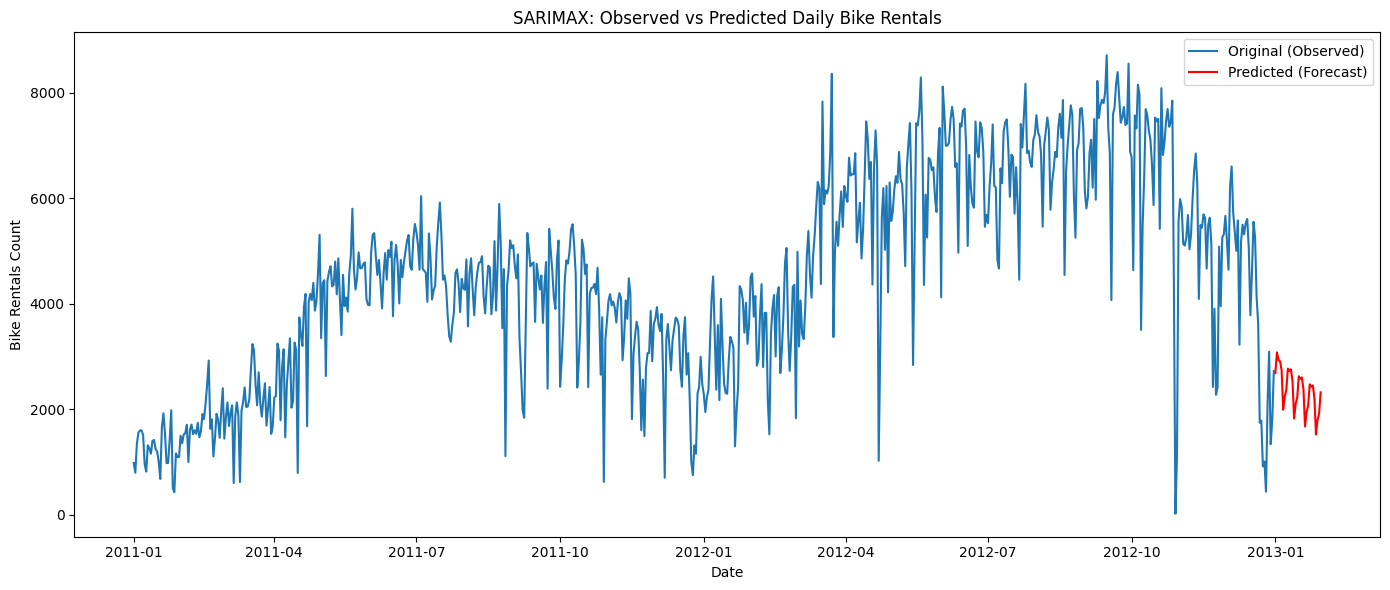

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load historical data
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
y = df['cnt']

# Load forecast (make sure 'sarimax_forecast.csv' was generated from previous example)
forecast_df = pd.read_csv('sarimax_forecast.csv')
forecast_df['date'] = pd.to_datetime(forecast_df['date'])
forecast_df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(y, label='Original (Observed)')
plt.plot(forecast_df['forecast'], label='Predicted (Forecast)', color='red')
plt.title('SARIMAX: Observed vs Predicted Daily Bike Rentals')
plt.xlabel('Date')
plt.ylabel('Bike Rentals Count')
plt.legend()
plt.tight_layout()
plt.show()

In [76]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load data
df=pd.read_csv(r"C:\Users\caash\Downloads\day - day.csv")
df['dteday'] = pd.to_datetime(df['dteday'])
df.set_index('dteday', inplace=True)
y = df['cnt']

# Fit SARIMAX model (same as before)
model = SARIMAX(
    y,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
results = model.fit(disp=False)

# Get in-sample predictions (fitted values)
y_pred = results.fittedvalues

# Because you used differencing (d=1), y_pred is for differenced series,
# so add it to previous values to get predictions on original scale
# Alternatively, use 'results.predict(start=..., end=...)' with dynamic=False
y_pred_orig = results.predict(start=y.index[0], end=y.index[-1], dynamic=False)

# Ensure alignment of true and predicted values
y_true = y.loc[y_pred_orig.index]

# Calculate metrics
mae = mean_absolute_error(y_true, y_pred_orig)
rmse = np.sqrt(mean_squared_error(y_true, y_pred_orig))
mape = np.mean(np.abs((y_true - y_pred_orig) / y_true)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\caash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAE: 638.1053631915968
RMSE: 921.8443339513302
MAPE: 58.498530520737766%


In [78]:
# Generate in-sample predictions (not dynamic)
y_pred = results.predict(start=y.index[0], end=y.index[-1], dynamic=False)

# Calculate R-squared
r2 = r2_score(y, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7732456418386155
